# Problem Statement
**XYZ Bank wants to focus on its credit card customer base in the next financial year. But to do so they have to run personalized campaigns to target new customer and upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. To tackle this we have to dig deep into the customers data extract the most useful information for the bank**

# Objectives:
- Explore and visualize the dataset.
- Build a Clustering model to make customer segmentation
- Generate a set of insights and recommendations that will help the bank

# Key Questions
- How many different types (clusters/segments) of customers can be found from the data?
- How do these different groups of customers differ from each other?
- Do you get slightly different solutions from two different techniques? How would you explain the difference?


# Data Attributes 

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [130]:
import warnings
warnings.filterwarnings('ignore')
# import data manipulation library|
import pandas as pd

# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# normalizing the dataset
from sklearn.preprocessing import StandardScaler

# for complex computation
import numpy as np

from scipy.spatial.distance import cdist


#Clustering Algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### Loading Dataset

In [131]:
df = pd.read_excel("Credit Card Customer Data.xlsx")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Get General infromation about dataframe

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**There are 7 attributes, all the attributes are integers, with no null values.**

### Lets check Unique values in each column

In [133]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**From above, it can be noticed that all the values for `Sl_No` are uniques, we can remove that column. Further `Customer Key` has almost unique values, it can also be removed but let's just remove `Sl_No` for now.**

In [134]:
df.drop('Sl_No', axis=1, inplace=True)
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


### Get the description of the dataset

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


# EDA

### Univariate

In [136]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

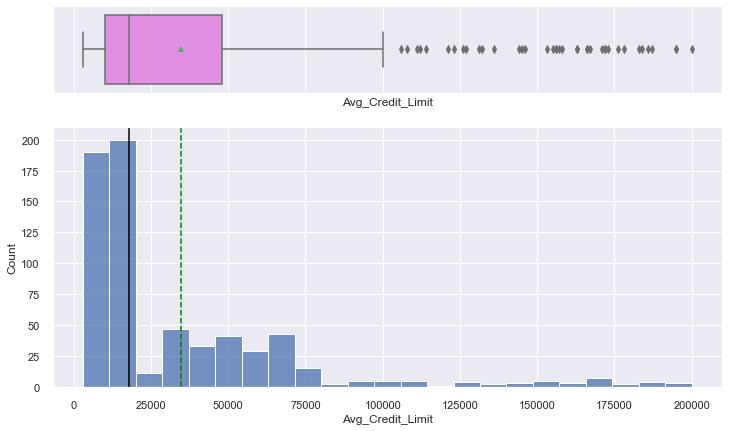

In [137]:
histogram_boxplot(df, "Avg_Credit_Limit")

- Most of the Customer credit limit on average is around `3000 - 22000`
- There are very few customers that have more then `100000` credit limit. 

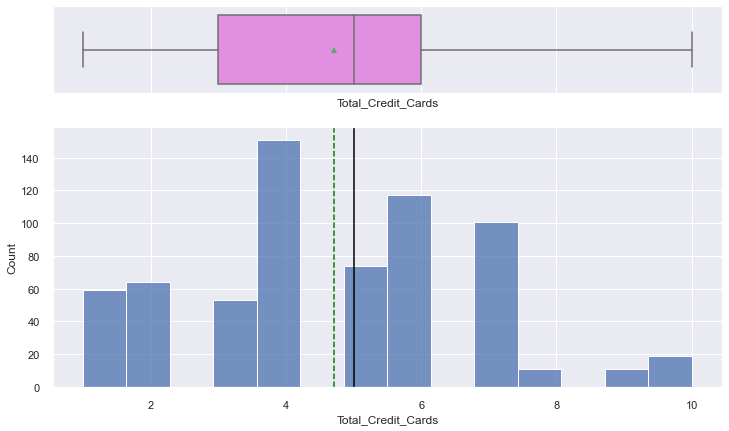

In [138]:
histogram_boxplot(df, 'Total_Credit_Cards')

- Having 4 credit cards are more common
- Most of the customers have `4 to 7` cards and few around `1 to 3`
- But very few customers have `8 to 10` cards

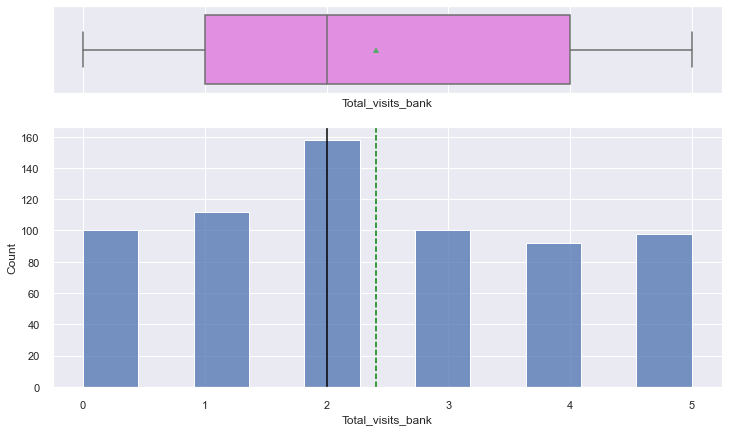

In [139]:
histogram_boxplot(df, 'Total_visits_bank')

- 2 is the most common visits to the bank
- Customers visits are almost equally distributed between 0, 3, 4, 5

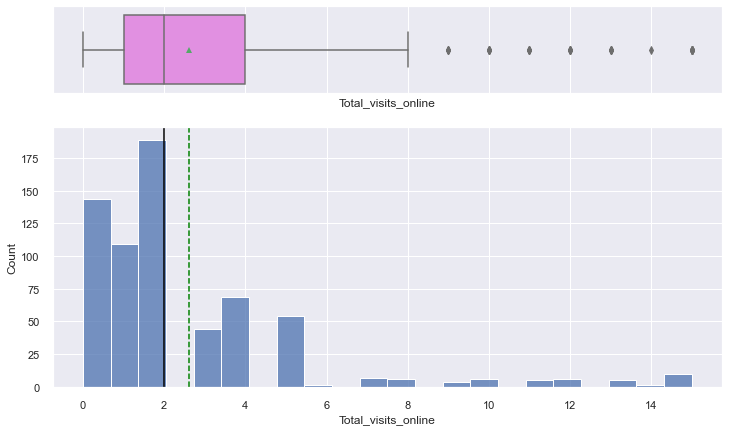

In [140]:
histogram_boxplot(df, 'Total_visits_online')

- It can be seen that most of the customer visits the online bank, `0-2` times a year.

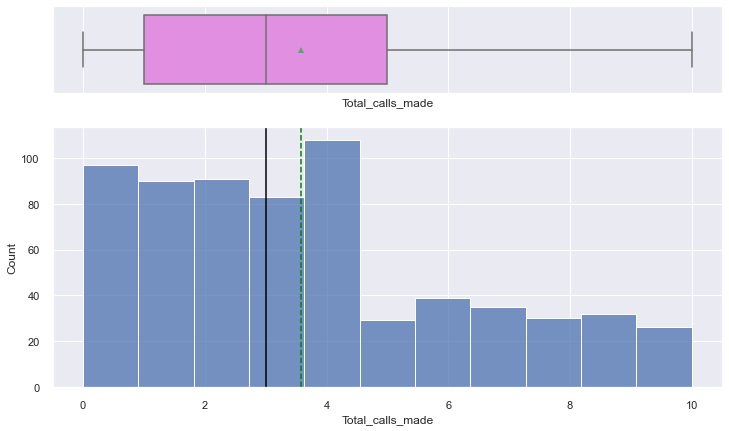

In [141]:
histogram_boxplot(df, 'Total_calls_made')

- `0-4` These are total calls that are made to the bank on yearly base

In [142]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

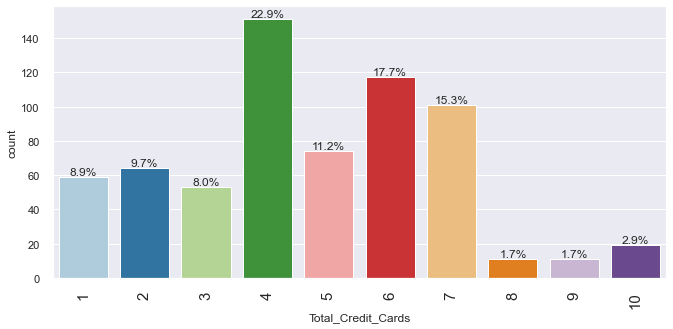

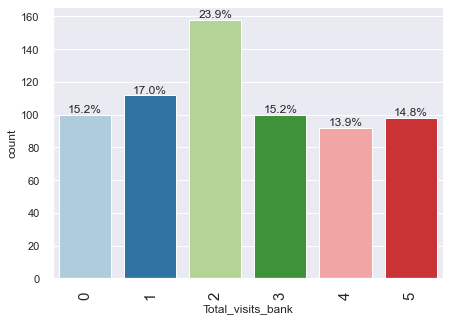

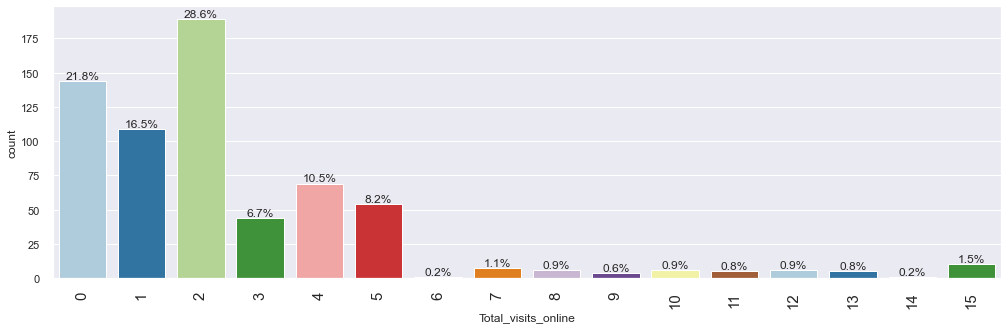

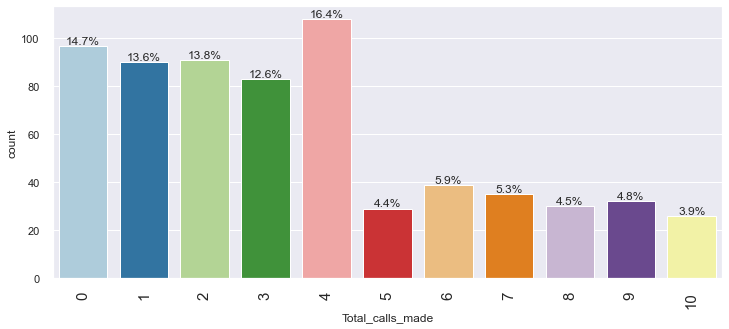

In [143]:
for item in df.columns:
    if item not in ['Avg_Credit_Limit', 'Customer Key']:
        labeled_barplot(df, item, perc=True)

### Bi-variate Analysis

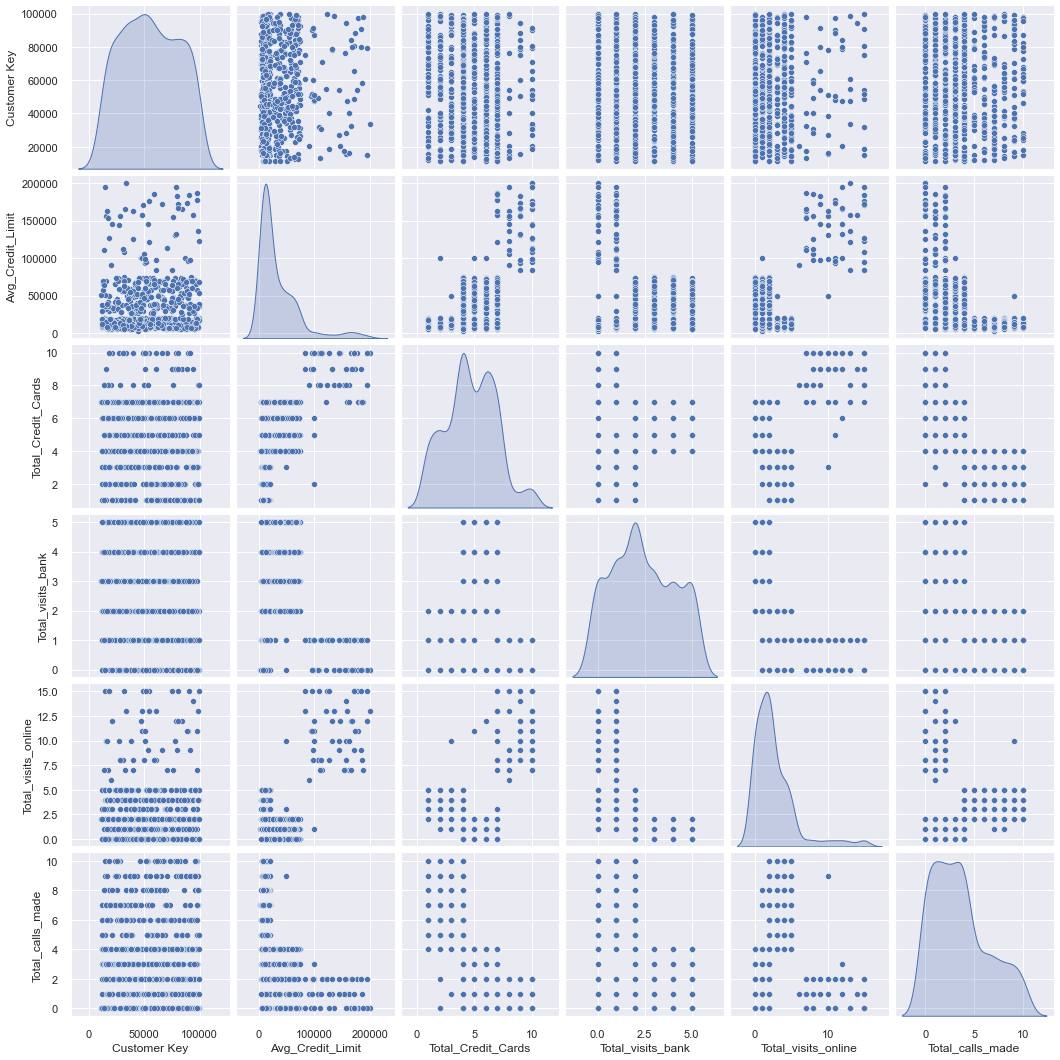

In [144]:
sns.pairplot(df, diag_kind="kde")
plt.show()

**Observations**

- `Avg_credit limit` and `Total visits online` both are almost right skewed.
- Distribution of `Total calls made` seems to be bimodal.

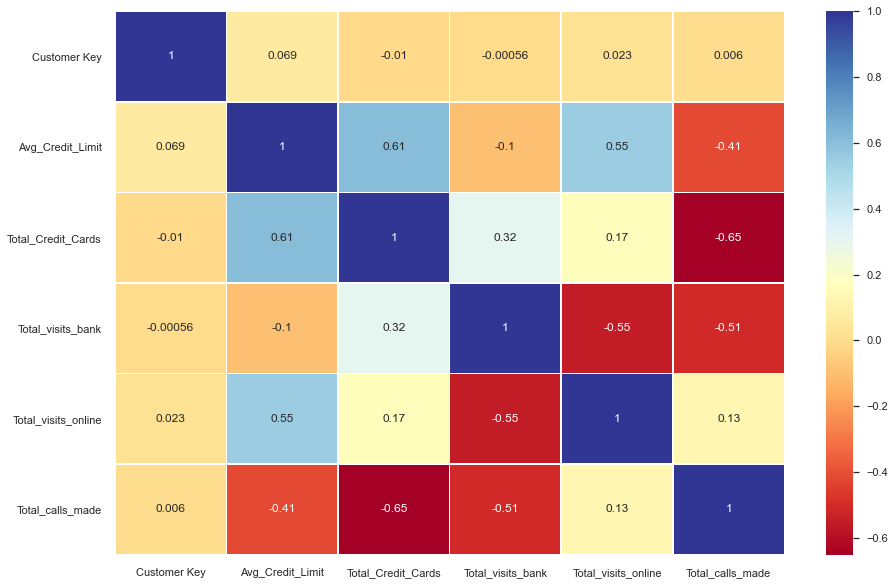

In [145]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.heatmap( df.corr(), annot=True, linewidths=0.5, cmap="RdYlBu")
plt.show()

- From above coorelation graph it can be noticed that `Total_calls_made` is negatively related to `Total_Credit_Cards`
- `Total_Credit_Cards` is positively related to `Avg_Credit_Limit`, meaning the more the Credit cards the more the credit limit
- `Total_visit_banks` is inversely(negatively) related to `Total_vists_online` and vise versa.
- `Customer Key` is not related to any of the other attributes ( value of 0.0x is very small)

# Data Preprocessing

#### Before proceeding, we know that there are no Null value columns, so lets skip that step

#### Checking Duplicate values

In [146]:
df['Customer Key'].duplicated().sum()

5

- There are 5 duplicate values for Customer Key lets remove them

In [147]:
df['Customer Key'].drop_duplicates(inplace=True)

#### Now that duplicate values are droped, lets just remove the `Customer Key` Column, Because as we know it has very neglegible relation to other columns

In [148]:
df.drop('Customer Key', axis=1, inplace=True)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


#### As from our univariate analysis, there are no outliers that are spread too far away from the real values. except Avg_Credit_Limit have few lets remove all values that exceed 150000

# K-Means Analysis

In [149]:
# df = df[df['Avg_Credit_Limit']< 150000]

# Scaling the data set before clustering
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# Creating a dataframe from the scaled data
scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [150]:
X = df.values

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990772333470802
Number of Clusters: 6 	Average Distortion: 0.9429600194368428
Number of Clusters: 7 	Average Distortion: 0.9093831298527965
Number of Clusters: 8 	Average Distortion: 0.8987112291881874


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

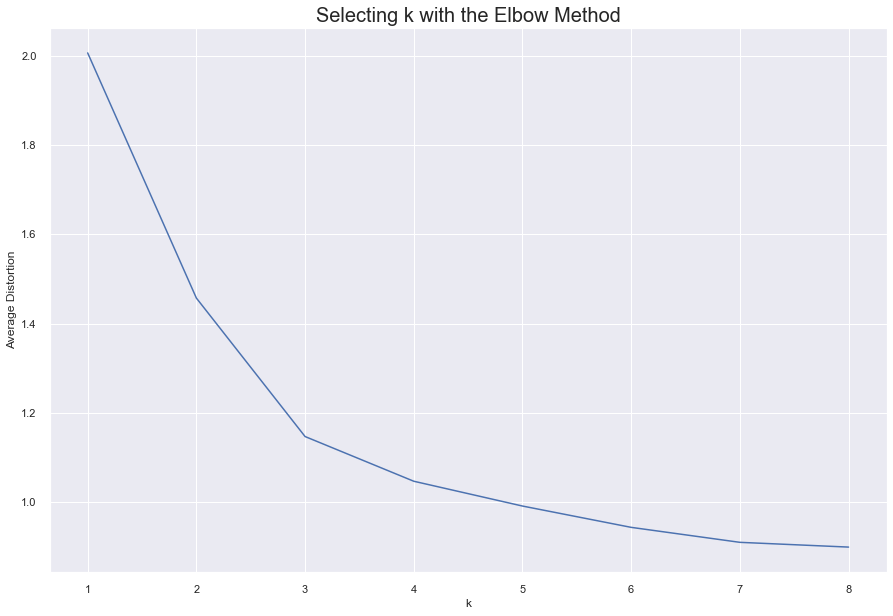

In [151]:
plt.figure(figsize=((15,10)))
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction = model.predict(scaled_df)
    distortion = (
        sum(
            np.min(cdist(scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

For n_clusters = 2, silhouette score is 0.33817196365464486
For n_clusters = 3, silhouette score is 0.4177434852377372
For n_clusters = 4, silhouette score is 0.3228907072652812
For n_clusters = 5, silhouette score is 0.28513882416721364
For n_clusters = 6, silhouette score is 0.25422115827085306
For n_clusters = 7, silhouette score is 0.2371132151519561
For n_clusters = 8, silhouette score is 0.22812339023436642
For n_clusters = 9, silhouette score is 0.19231807416354726


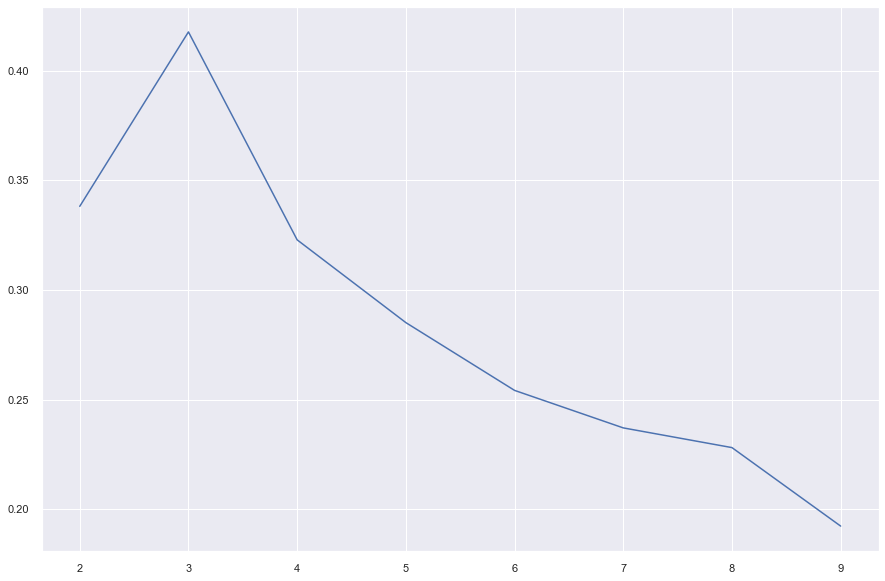

In [152]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

#### Based on above `Elbow Method` and `silhouette_score` We would go with 3, 3 has high Silhoutte score and have less distortion in elbow method

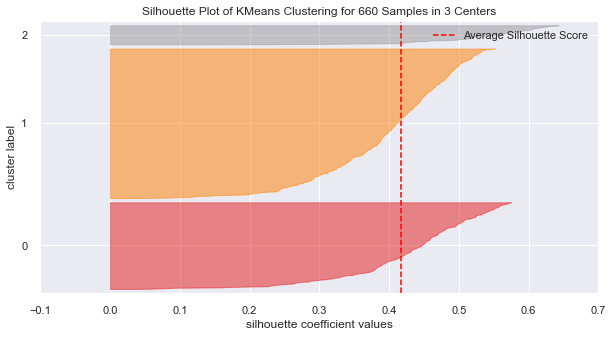

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [153]:
# finding optimal no. of clusters with silhouette coefficients
plt.figure(figsize=((10,5)))
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

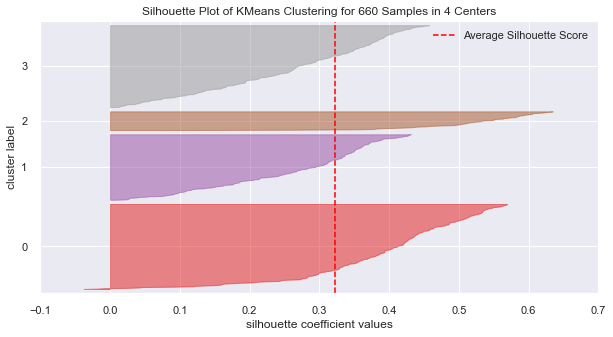

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [154]:
# finding optimal no. of clusters with silhouette coefficients
plt.figure(figsize=((10,5)))
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

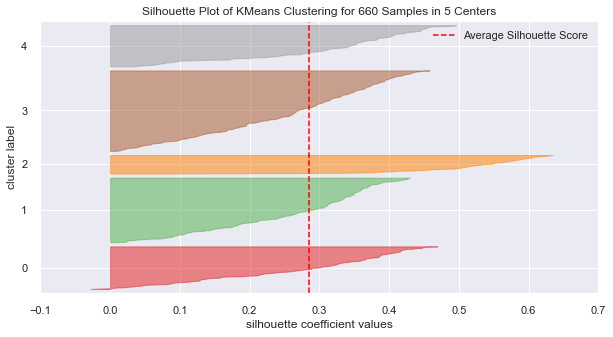

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [155]:
# finding optimal no. of clusters with silhouette coefficients
plt.figure(figsize=((10,5)))
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

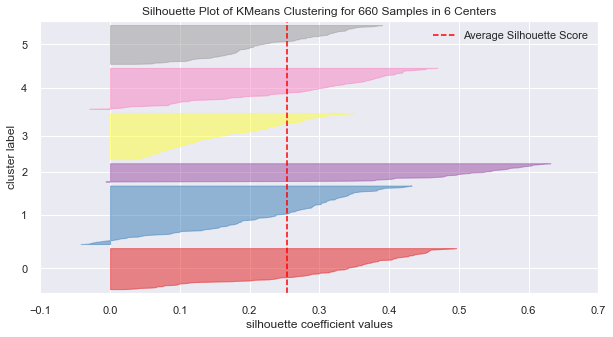

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [156]:
# finding optimal no. of clusters with silhouette coefficients
plt.figure(figsize=((10,5)))
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

# Hierarchical clustering  Analysis

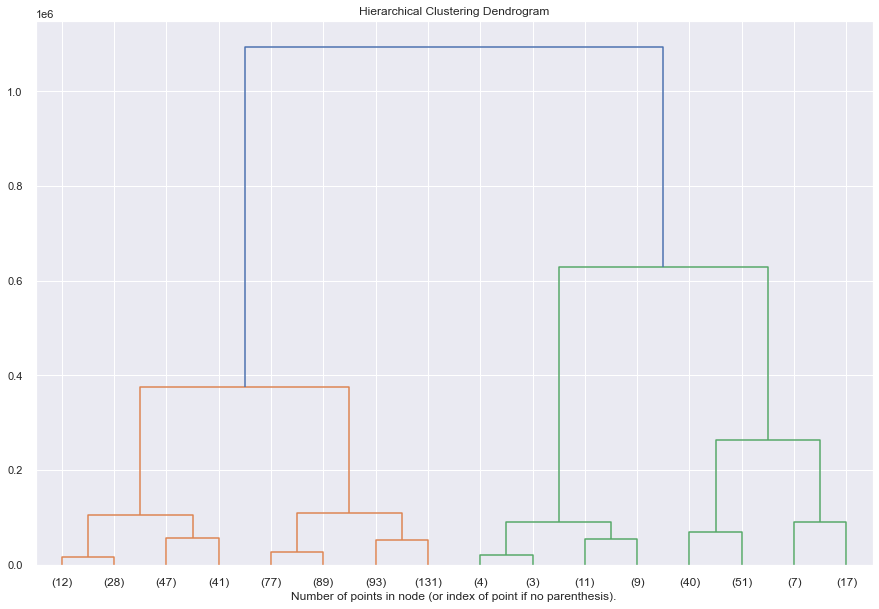

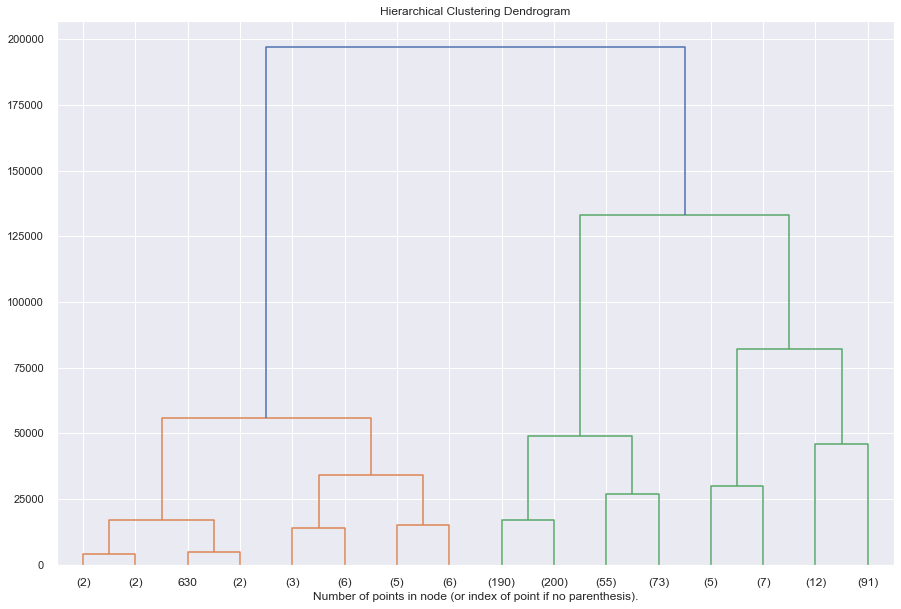

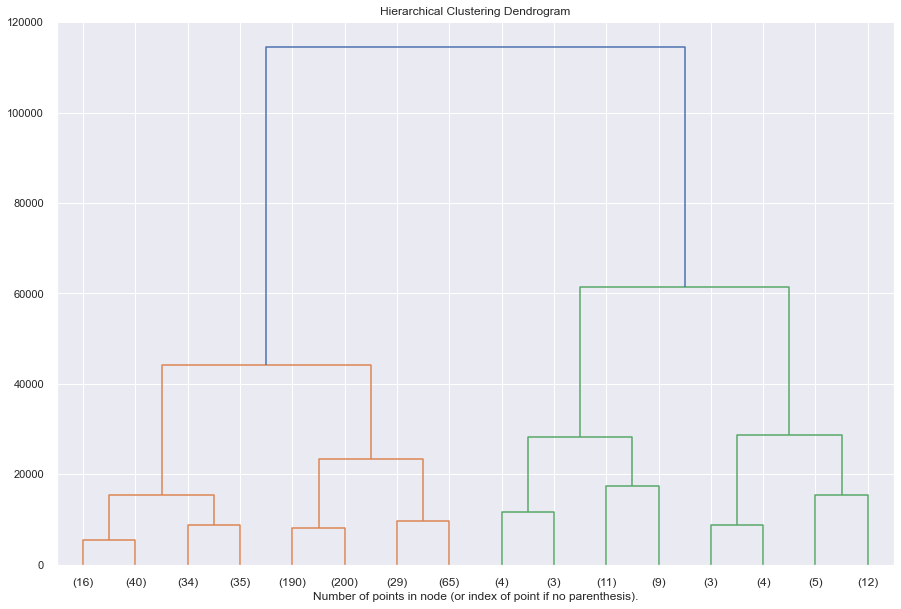

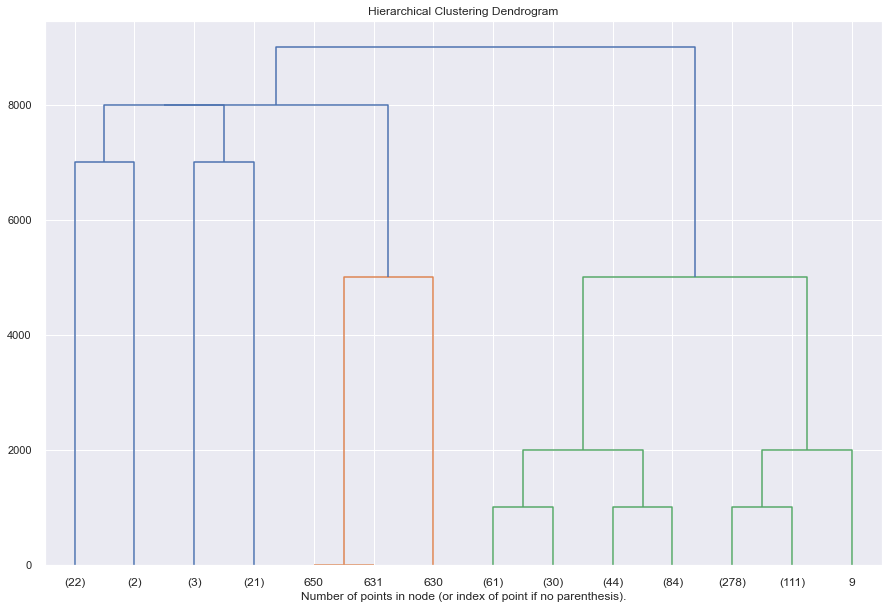

In [157]:
linkage = ['ward', 'complete', 'average', 'single']

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
for link in linkage:
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=link)

    model = model.fit(X)
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

#### According to Hierarchical clustering, 3 clusters are the best , so now we know that both algortihm prefers 3 clusters, lets now compare both

# Comparing K means and Agglomerative Alogrithm

In [158]:
agglo_model = AgglomerativeClustering(n_clusters=3)  # Hierarchical clustering model
agglo_model.fit(X)

k_model = KMeans(n_clusters=3, random_state=10)  # K means model
k_model.fit(X)

df['K_means_cluster'] = k_model.labels_
df['agglo_cluster'] = agglo_model.labels_

cluster_profile_kmean = df.groupby("K_means_cluster").mean()
cluster_profile_agglo = df.groupby("agglo_cluster").mean()

In [159]:
cluster_profile_kmean["count_in_each_segment"] = (
    df.groupby("K_means_cluster")["Total_Credit_Cards"].count().values
)

cluster_profile_agglo["count_in_each_segment"] = (
    df.groupby("agglo_cluster")["Total_Credit_Cards"].count().values
)

In [160]:
cluster_profile_kmean.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,agglo_cluster,count_in_each_segment
K_means_cluster,,,,,,,
0,13849.187935,3.888631,2.211137,2.315545,4.491879,0.000000,431
1,154205.128205,8.743590,0.589744,10.871795,1.000000,1.692308,39
2,57031.578947,5.731579,3.210526,1.568421,2.052632,0.542105,190


In [161]:
cluster_profile_agglo.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_cluster,count_in_each_segment
agglo_cluster,,,,,,,
0,18810.810811,4.169884,2.432432,2.115830,4.106178,0.335907,518
1,73982.608696,6.191304,2.704348,2.878261,1.843478,1.895652,115
2,169148.148148,8.666667,0.555556,10.851852,0.962963,1.000000,27


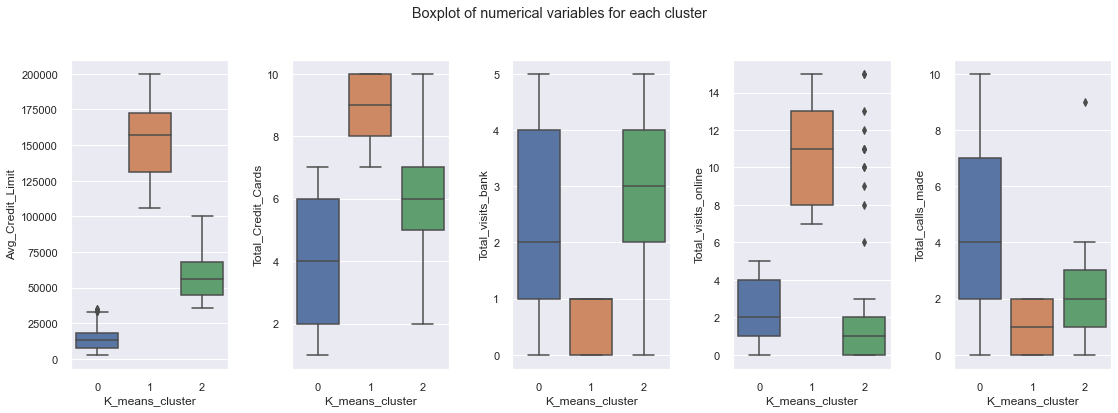

In [162]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_cluster"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_cluster'>

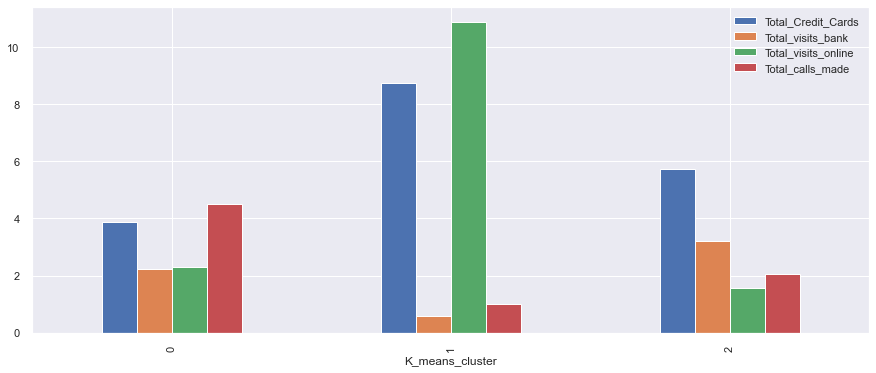

In [166]:
df.drop(['Avg_Credit_Limit', 'agglo_cluster'], axis=1).groupby("K_means_cluster").mean().plot.bar(figsize=(15, 6))

<AxesSubplot:xlabel='K_means_cluster'>

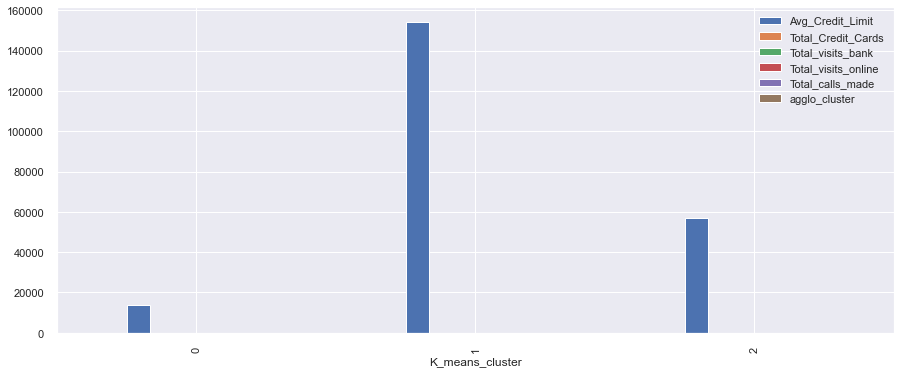

In [168]:
df.groupby("K_means_cluster").mean().plot.bar(figsize=(15, 6))

### Insights for Kmeans Algorithm

- **Clusters 0**:
    - Total Avg credit limit is around 15000-25000
    - Total credit card a customer holds is 4-6.
    - Total visits to the bank are around 2-4.
    - Total visits online are around 2-3.
    - Total calss made to the bank are also high around 4-6.

- **Cluster 1**:
    - Total Avg credit limit is very high
    - Total credit card a customer holds are very high.
    - Total visits to the bank very low compared to other clusters.
    - Though,Total visits online are at its peak.
    - Total calss made are also low.
    
- **Cluster 2**:
    - Total Avg credit limit is around 60000-100000.
    - Total credit card a customer holds is high around 6-10.
    - Total visits to the bank are around 2-5.
    - Total visits online are around 1-3.
    - Total calss made to the bank are around 2-4.





<AxesSubplot:xlabel='agglo_cluster'>

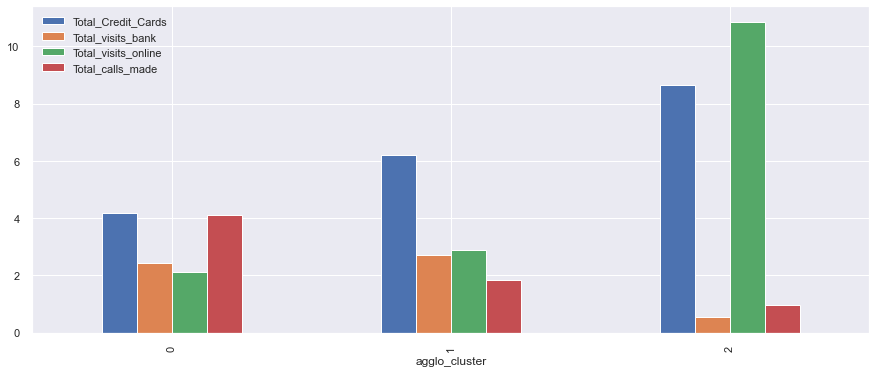

In [167]:
df.drop(['Avg_Credit_Limit', 'K_means_cluster'], axis=1).groupby("agglo_cluster").mean().plot.bar(figsize=(15, 6))

<AxesSubplot:xlabel='agglo_cluster'>

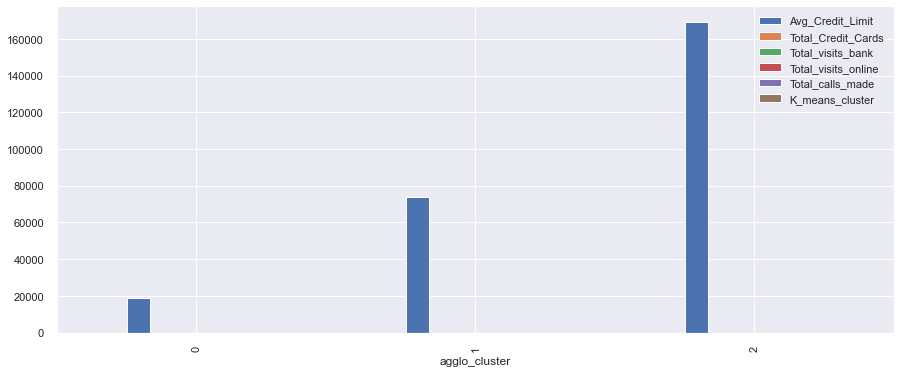

In [169]:
df.groupby("agglo_cluster").mean().plot.bar(figsize=(15, 6))

### Insights for Hierarichal Algorithm

- **Clusters 0**:
    - Total Avg credit limit is around 18000-30000
    - Total credit card a customer holds is 4-6.
    - Total visits to the bank are around 2-4.
    - Total visits online are around 2-3.
    - Total calss made to the bank are also high around 4-6.


- **Cluster 1**:
    - Total Avg credit limit is around 70000-115000
    - Total credit card a customer holds is high around 6-10.
    - Total visits to the bank are almost same as cluster 0.
    - Total visits online are around 2-4.
    - Total calss made to the bank are low.

- **Cluster 2**:
    - Total Avg credit limit is very high.
    - Total credit card a customer holds are very high.
    - Total visits to the bank very low compared to other clusters.
    - Though,Total visits online are at its peak.
    - Total calss made are also low.



#### From above 2 algorithms we saw that there is not much difference betweent the 2 only that `K-Means cluster 1` is same as `Agglomerative algorithm cluster 2` and vice versa. 

# Business Recommendations

- **Cluster 0**: These are the Tier 3 Customers with less credits cards and have less limit on their cards, have more calls made to the bank, with moderate visits **Bank looking for the average/low salary customers can approach this cluster for quantity sales rather then qualtiy sales**


- **Cluster 1**: These are the Tier 2 Customer or middle upper class, These customer spendings are much based on their credit limits and number of credit cards. These customer prefer visiting the bank or visiting online then calling the bank. **Bank should approach these customers, they will be more willing to purchase from the bank, bank should also work on thier online presence and physical space.**


- **Cluster 2**: These are the Tier 1 Customer or elite class, These customer spendings are way higher then other clusters based on their credit limits and number of credit cards. These customer are very busy so instead of calling or going to bank they visits online. **The bank should first work on improving their online presence, and there should be no delayed in the response from the website, Bank should also work on their customer support, after having best of both then should they target these customers, They might be less in quantity but they are worth more then cluster 1 and cluster 0 combined.**